In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from pathlib import Path

import pandas as pd

# Path to a benchmark CSV, e.g. produced by bench-mphf-hashing
DATA_ROOT = Path("../..") / "data"
CSV_PATH = DATA_ROOT / "mphf_hashing_bench_small.csv"  # adjust as needed

df = pd.read_csv(CSV_PATH)

In [6]:
df

,strategy,n,seed,build_time_us,query_time_us,query_time_ns_per_key,size_bytes,bits_per_key,m,m_over_n,retries,build_success
0,BaselineStorage,1000,1042,1690,1320,264.000,656,5.24800,1271,1.27100,0,1
1,PackedTritStorage_ExplicitB,1000,1042,1171,1420,284.000,532,4.25600,1271,1.27100,0,1
2,PackedTritStorage_CompressedB,1000,1042,1718,19552,3910.400,510,4.08000,1271,1.27100,0,1
3,GlGhStorage,1000,1042,1131,715,143.000,496,3.96800,1271,1.27100,0,1
4,BaselineStorage,10000,10042,12504,6694,133.880,5256,4.20480,12589,1.25890,0,1
5,PackedTritStorage_ExplicitB,10000,10042,11212,10837,216.740,4100,3.28000,12589,1.25890,0,1
6,PackedTritStorage_CompressedB,10000,10042,9280,127013,2540.260,3374,2.69920,12589,1.25890,0,1
7,GlGhStorage,10000,10042,10712,6577,131.540,3680,2.94400,12589,1.25890,0,1
8,BaselineStorage,100000,100042,142446,69015,138.030,50944,4.07552,125037,1.25037,0,1
9,PackedTritStorage_ExplicitB,100000,100042,124468,110415,220.830,39676,3.17408,125037,1.25037,0,1


In [7]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

strategies = df["strategy"].unique()
strategies


array(['BaselineStorage', 'PackedTritStorage_ExplicitB',
       'PackedTritStorage_CompressedB', 'GlGhStorage'], dtype=object)

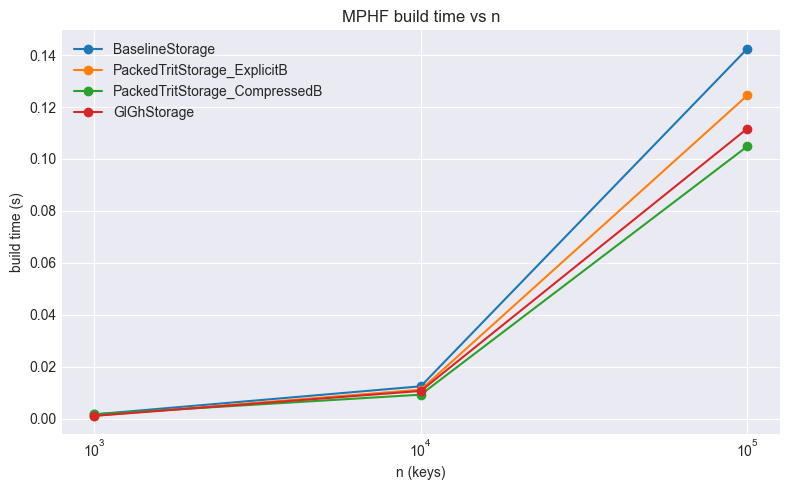

In [13]:
# Build time vs n (seconds) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["build_time_us"] / 1e6, marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("build time (s)")
ax.set_title("MPHF build time vs n")
ax.legend()
fig.tight_layout()


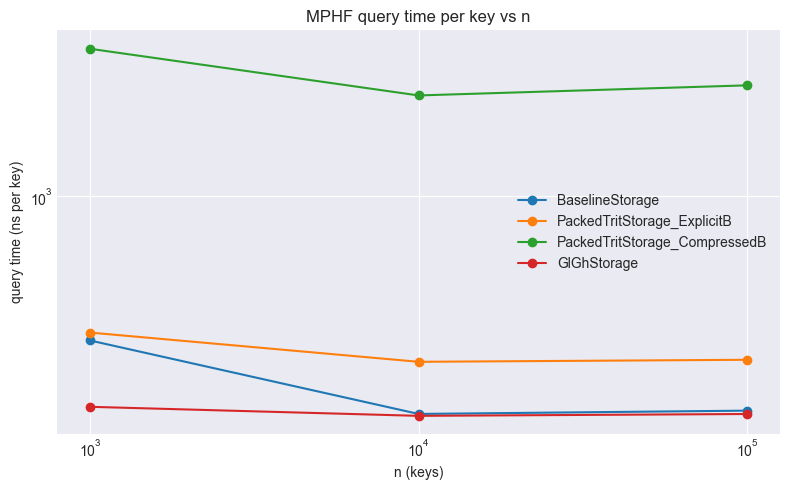

In [12]:
# Query time per key vs n (ns) per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["query_time_ns_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("query time (ns per key)")
ax.set_title("MPHF query time per key vs n")
ax.legend()
fig.tight_layout()

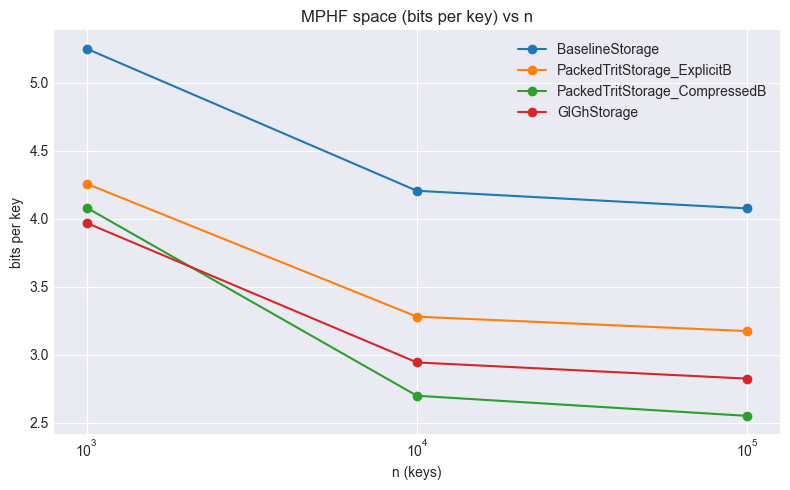

In [14]:
# Bits per key vs n per strategy
fig, ax = plt.subplots(figsize=(8, 5))

for s in strategies:
    sub = df[df["strategy"] == s].sort_values(by="n")
    ax.plot(sub["n"], sub["bits_per_key"], marker="o", label=s)

ax.set_xscale("log")
ax.set_xlabel("n (keys)")
ax.set_ylabel("bits per key")
ax.set_title("MPHF space (bits per key) vs n")
ax.legend()
fig.tight_layout()
